## 1. Linear Regression with Scikit-Learn
- Problem Description
- Data Review
- Data Visualization
- Univariate Regression Analysis
- Multivariate Regression Analysis

##### Variables/Değişkenler
- sex: cinsiyet
- age: yaş
- bmi: vücut kitle indeksi
- smoker: sigara durumu
- region: bölge
- charges: prim miktarı

#### PROBLEM DESCRIPTION
PROBLEM:  An insurance company wants to build a model to determine the insurance premiums of its customers. It wants to predict insurance premiums based on customers' age, gender, BMI, number of children, whether they smoke or not, and region.
    For this purpose, we will use a CSV file (medical.csv) containing the data of more than 1300 clients. 

#### PROBLEM TANIMI
PROBLEM:  Bir sigorta şirketi müşterilerinin sigorta primlerini belirlemek için bir model oluşturmak istemektedir. Müşterilerin yaşlarına, cinsiyetlerine, BMI'lerine, çocuk sayılarına, sigara içip içmediklerine ve bölgeye göre sigorta primlerini tahmin etmek istemektedir.
    Bu amaçla, 1300'den fazla müşterinin verilerini içeren bir CSV dosyası(medical.csv) kullanacağız. 


### Data Review

In [3]:
# Uploading data
import pandas as pd
df=pd.read_csv('medical.csv')

In [2]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
#check for missing data
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
#summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [7]:
!pip install plotly matplotlib seaborn --quiet

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [9]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

### Data Visualization

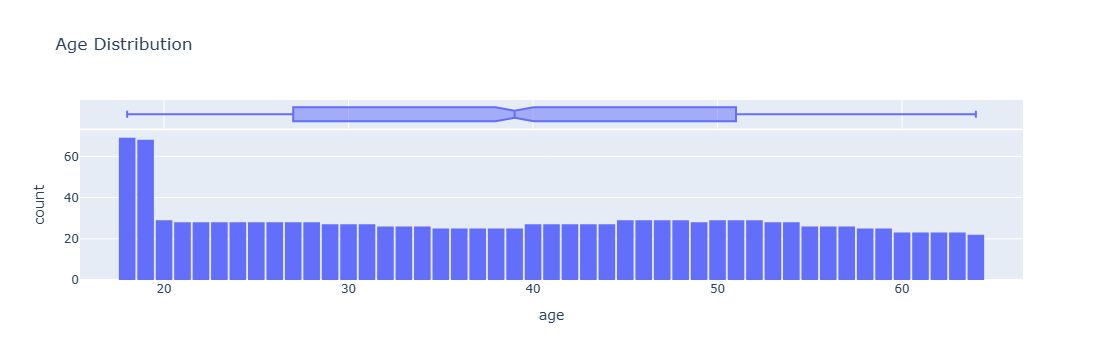

In [17]:
fig=px.histogram(df,x="age",marginal="box",nbins=47,title="Age Distribution")
fig.update_layout(bargap=0.1)
fig.show()

In [143]:
#The age variable is fairly evenly distributed, no outlier age values appear.

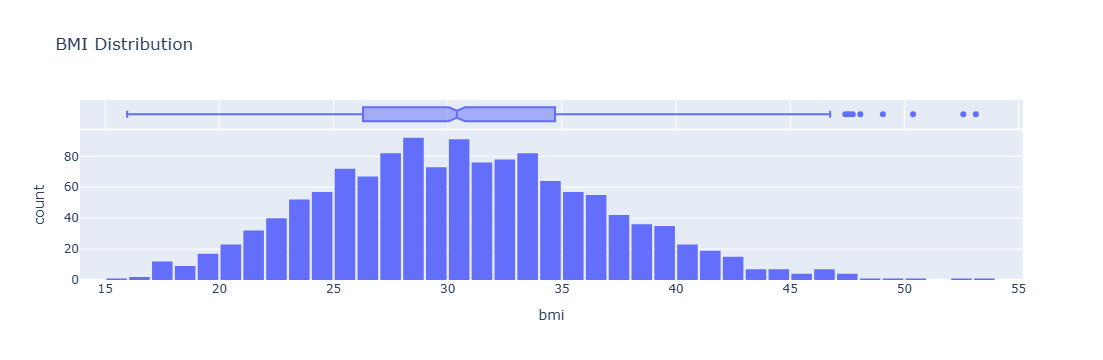

In [12]:
fig=px.histogram(df,x="bmi",marginal="box",title="BMI Distribution")
fig.update_layout(bargap=0.1)
fig.show()

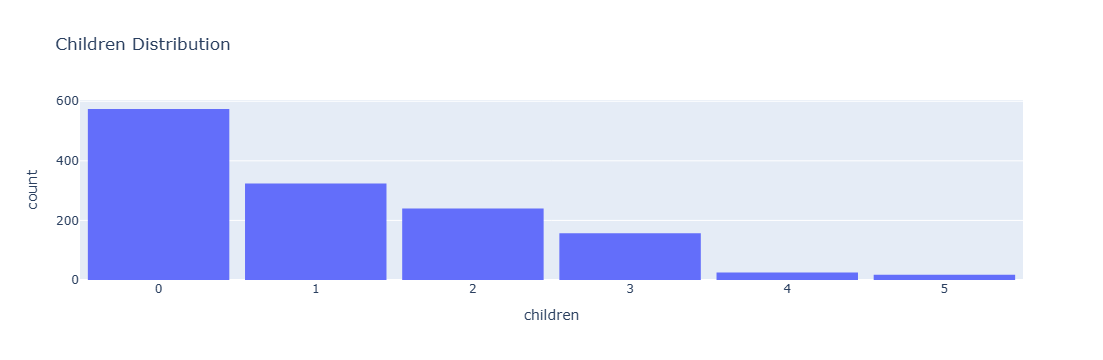

In [18]:
fig=px.histogram(df,x="children",title="Children Distribution")
fig.update_layout(bargap=0.1)
fig.show()

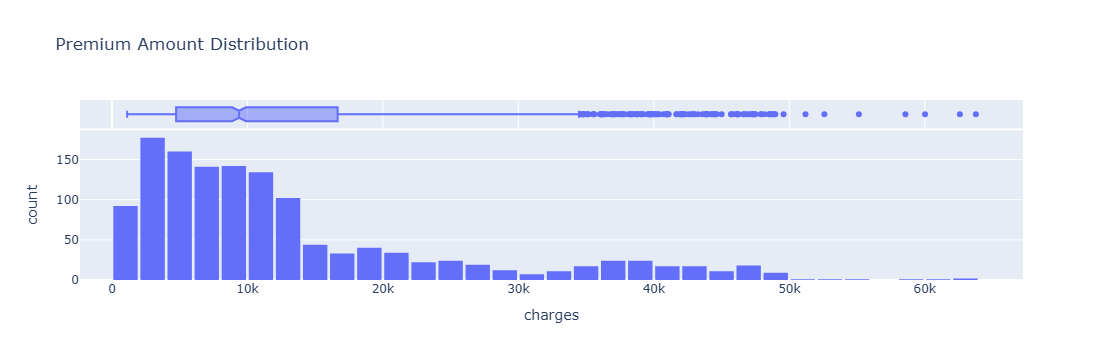

In [14]:
fig=px.histogram(df,x="charges",marginal="box",title="Premium Amount Distribution")
fig.update_layout(bargap=0.1)
fig.show()

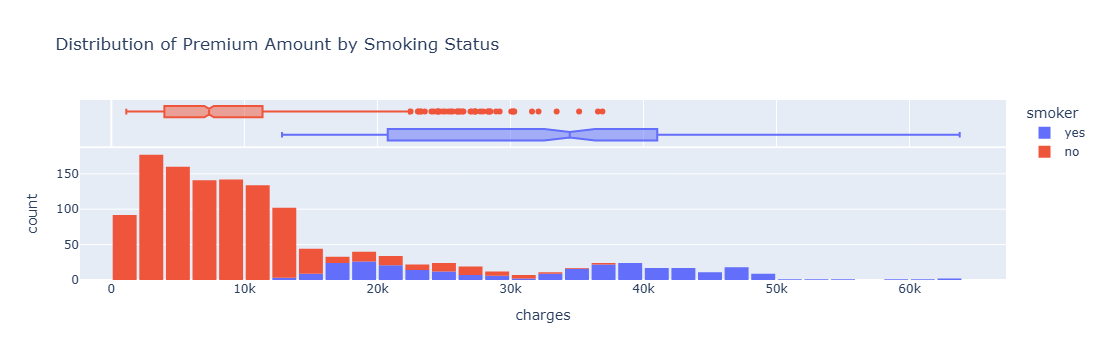

In [15]:
fig=px.histogram(df,x="charges",color="smoker",marginal="box",title="Distribution of Premium Amount by Smoking Status")
fig.update_layout(bargap=0.1)
fig.show()

In [144]:
#Non-smokers have a lower and narrower wage distribution.

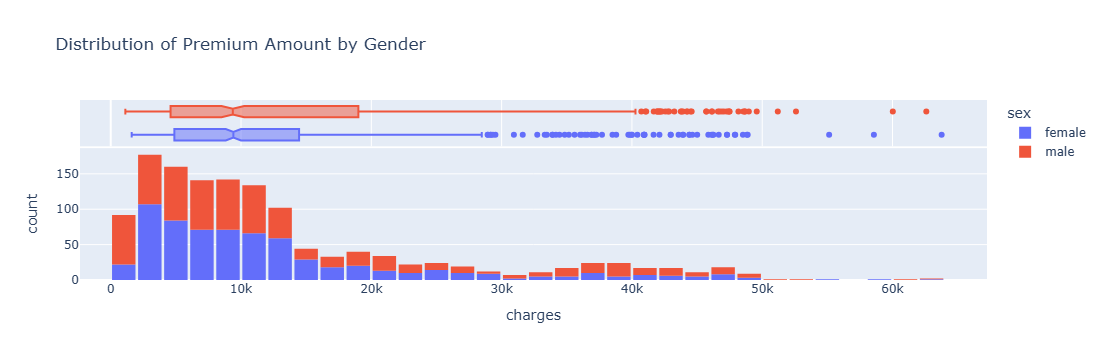

In [16]:
fig=px.histogram(df,x="charges",color="sex",marginal="box",title="Distribution of Premium Amount by Gender")
fig.update_layout(bargap=0.1)
fig.show()

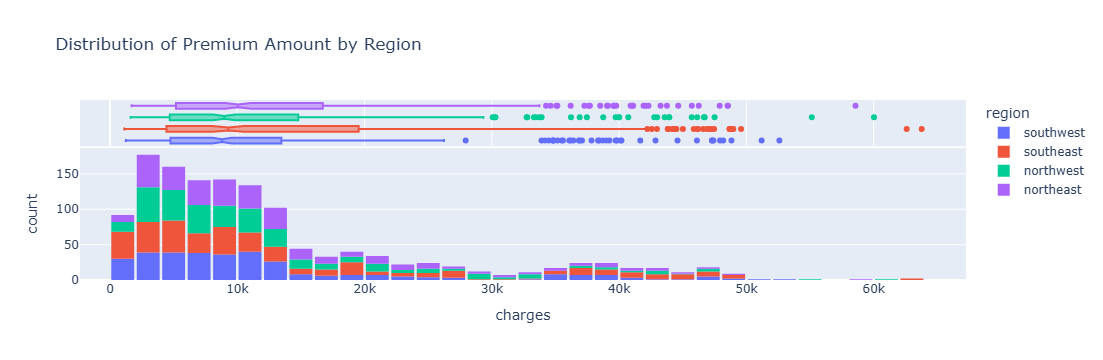

In [19]:
fig=px.histogram(df,x="charges",color="region",marginal="box",title="Distribution of Premium Amount by Region")
fig.update_layout(bargap=0.1)
fig.show()

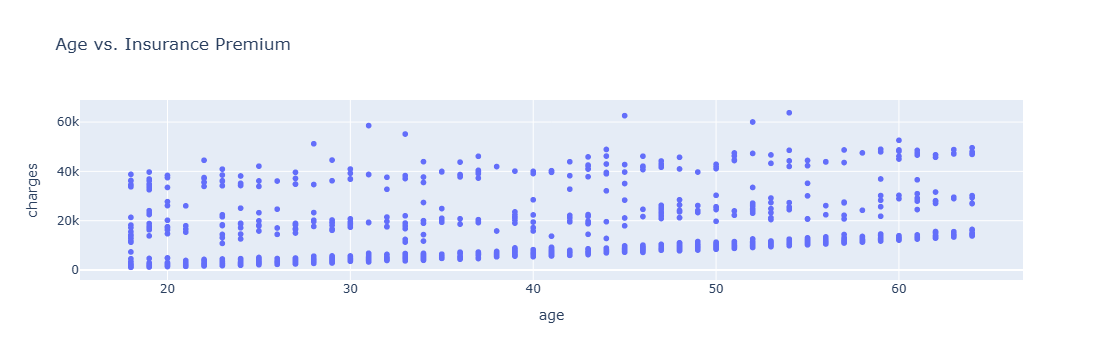

In [22]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(10,6)
fig=px.scatter(df,x="age",y="charges",title="Age vs. Insurance Premium")
fig.show()

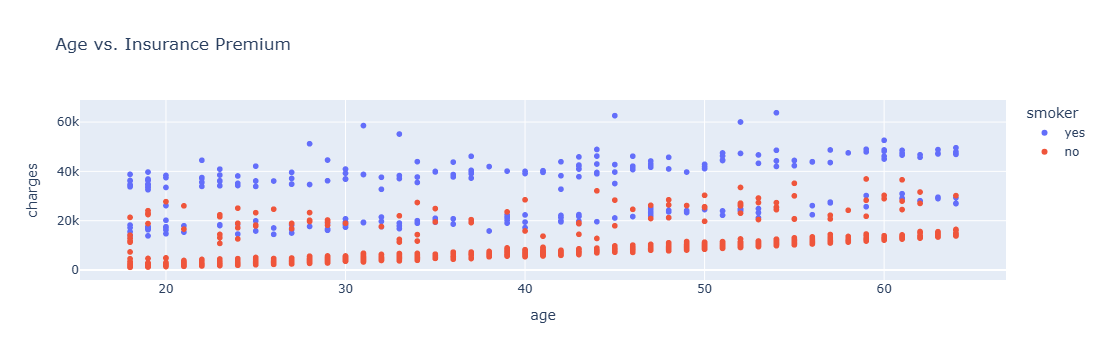

In [24]:
fig=px.scatter(df,x="age",y="charges",color="smoker",title="Age vs. Insurance Premium")

fig.show()

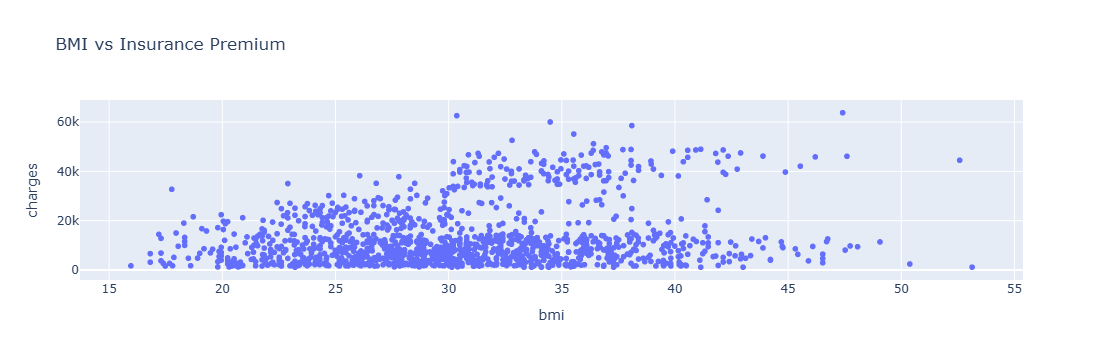

In [25]:
fig=px.scatter(df, x="bmi",y="charges",title="BMI vs Insurance Premium")
fig.show()

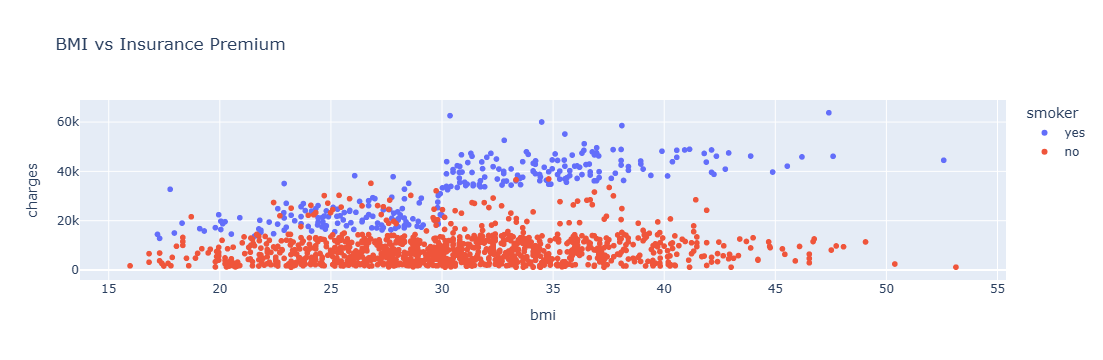

In [27]:
fig=px.scatter(df, x="bmi",y="charges",color='smoker',title="BMI vs Insurance Premium")
fig.show()

In [28]:
#correlation
df.charges.corr(df.age)

0.29900819333064765

In [29]:
df.charges.corr(df.bmi)

0.19834096883362892

In [30]:
numeric_columns=df.select_dtypes(include=['int64','float64']).columns
numeric_columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [31]:
correlation_matrix=df[numeric_columns].corr()
correlation_matrix

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


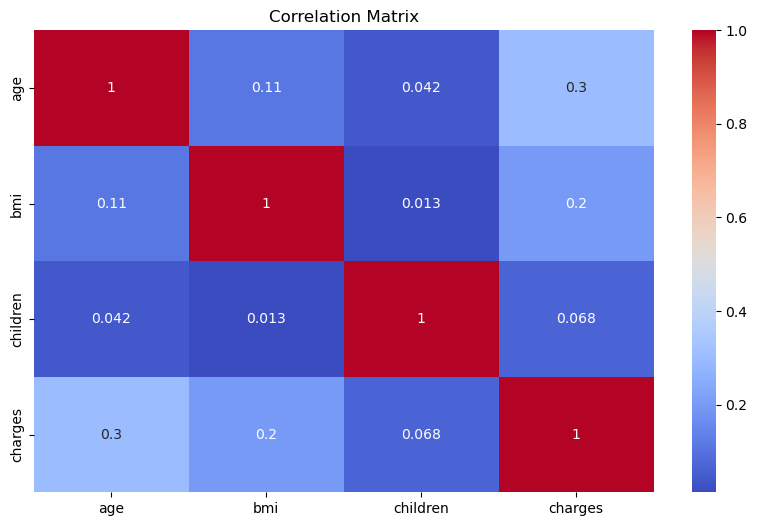

In [33]:
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### Univariate Regression Analysis

In [34]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [35]:
non_smoker_df=df[df.smoker=='no']
non_smoker_df.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [36]:
from sklearn.linear_model import LinearRegression

In [42]:
model=LinearRegression()

In [37]:
x = non_smoker_df[['bmi']]

In [38]:
y=non_smoker_df.charges

In [40]:
print('size of x:', x.shape)
print('size of y:', y.shape)

size of x: (1064, 1)
size of y: (1064,)


In [43]:
model.fit(x,y)

LinearRegression()

In [46]:
print('Coefficient(w):',model.coef_)
print('Constant(b):',model.intercept_)

Coefficient(w): [83.35055766]
Constant(b): 5879.424081872976


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.20, random_state = 42)

In [49]:
print('size of the x_train:', x_train.shape)
print('size of the x_test:', x_test.shape)
print('size of the y_train:', y_train.shape)
print('size of the y_test:', x_test.shape)

size of the x_train: (851, 1)
size of the x_test: (213, 1)
size of the y_train: (851,)
size of the y_test: (213, 1)


In [50]:
model.fit(x_train, y_train)

LinearRegression()

In [51]:
print('Coefficient(w):',model.coef_)
print('Constant(b):',model.intercept_)

Coefficient(w): [95.9147548]
Constant(b): 5528.0843389959755


##### Model Evaluation:
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- R-squared (R²)

In [52]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np

In [53]:
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)


In [54]:
print('MAE:',mae)
print('MSE:',mse)
print('RMSE:',rmse)
print('R2:',r2)

MAE: 4509.916772747249
MSE: 35232666.16057408
RMSE: 5935.71109140043
R2: -0.0035388609321893583


In [55]:
import matplotlib.pyplot as plt

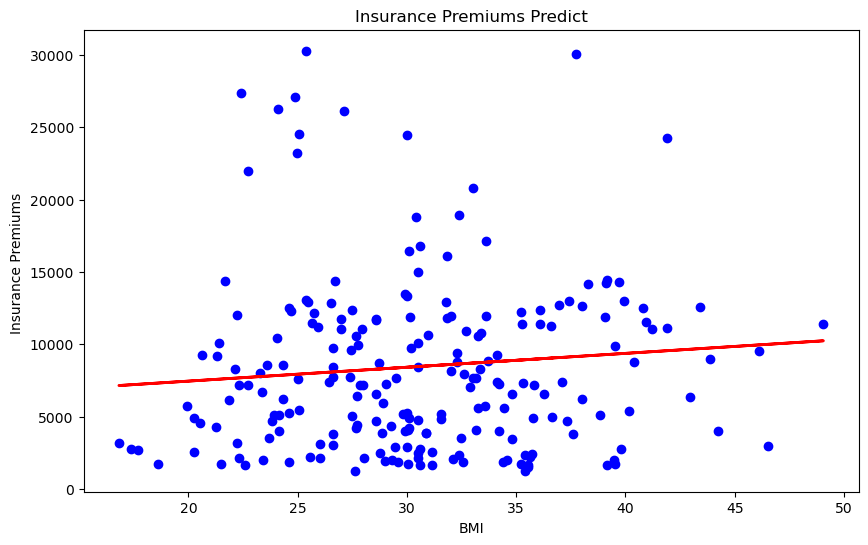

In [56]:
plt.figure(figsize = (10,6))
plt.scatter(x_test,y_test,color="blue")
plt.plot(x_test,y_pred,color="red",linewidth = 2)
plt.xlabel("BMI")
plt.ylabel("Insurance Premiums ")
plt.title("Insurance Premiums Predict")
plt.show()

In [145]:
#Although the BMI variable seems to have an impact on the insurance fee, it is insufficient to build a regression model on its own.

In [69]:
model_age = LinearRegression()

In [70]:
X=non_smoker_df[['age']]

In [71]:
y=non_smoker_df.charges

In [72]:
print('size of x:', x.shape)
print('size of y:', y.shape)

size of x: (1064, 1)
size of y: (1064,)


In [80]:
model_age.fit(X_train, y_train)

LinearRegression()

In [81]:
print('Coefficient(w):',model_age.coef_)
print('Constant(b):',model_age.intercept_)

Coefficient(w): [265.0401446]
Constant(b): -1995.5541584544007


In [82]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [76]:
print('size of the x_train:', x_train.shape)
print('size of the x_test:', x_test.shape)
print('size of the y_train:', y_train.shape)
print('size of the y_test:', x_test.shape)

size of the x_train: (851, 1)
size of the x_test: (213, 1)
size of the y_train: (851,)
size of the y_test: (213, 1)


##### Model Evaluation:
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- R-squared (R²)

In [83]:
y_pred = model_age.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

In [84]:
print('MAE:',mae)
print('MSE:',mse)
print('RMSE:',rmse)
print('R2:',r2)

MAE: 2508.682862791197
MSE: 19603075.14431584
RMSE: 4427.536012763288
R2: 0.441641810147521


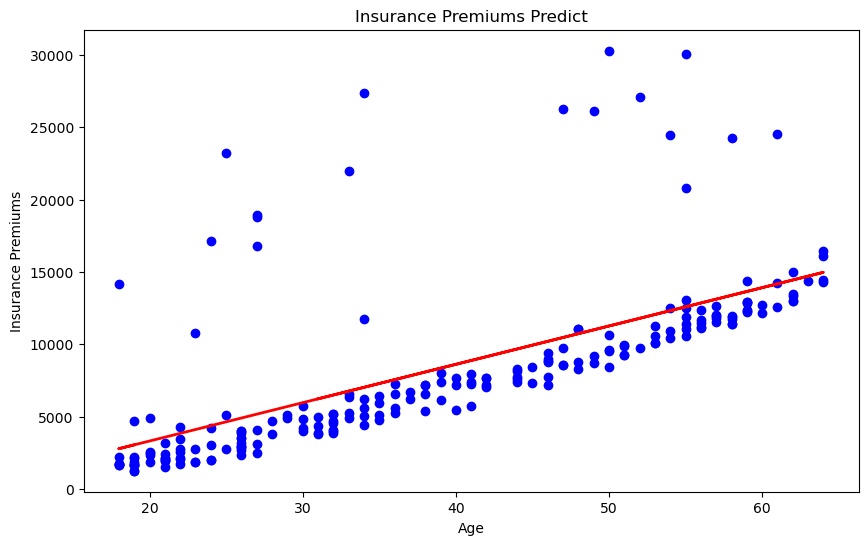

In [85]:
plt.figure(figsize=(10,6))
plt.scatter(X_test,y_test,color='blue')
plt.plot(X_test,y_pred,color='red',linewidth=2)
plt.xlabel("Age")
plt.ylabel("Insurance Premiums")
plt.title("Insurance Premiums Predict")
plt.show()

In [151]:
 # The cost of insurance tends to increase as age increases and the model captures this relationship.

Let's estimate the premium for smokers

In [96]:
model = LinearRegression()

In [97]:
x = smoker_df[['age']]

In [98]:
y = smoker_df.charges

In [99]:
smoker_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


In [100]:
smoker_df = df[df.smoker == 'yes']

In [101]:
print('size of x:', x.shape)
print('size of y:', y.shape)

size of x: (274, 1)
size of y: (274,)


In [102]:
model.fit(x,y)

LinearRegression()

In [103]:
print('Coefficient(w):',model_age.coef_)
print('Constant(b):',model_age.intercept_)

Coefficient(w): [265.0401446]
Constant(b): -1995.5541584544007


In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.20, random_state = 42)

In [105]:
print('size of the x_train:', x_train.shape)
print('size of the x_test:', x_test.shape)
print('size of the y_train:', y_train.shape)
print('size of the y_test:', x_test.shape)

size of the x_train: (219, 1)
size of the x_test: (55, 1)
size of the y_train: (219,)
size of the y_test: (55, 1)


In [106]:
model.fit(x_train, y_train)

LinearRegression()

In [107]:
print('Coefficient(w):',model_age.coef_)
print('Constant(b):',model_age.intercept_)

Coefficient(w): [265.0401446]
Constant(b): -1995.5541584544007


##### Model Evaluation:
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- R-squared (R²)

In [109]:
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

In [110]:
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2:",r2)

MAE: 11068.729655335132
MSE: 140278327.00197324
RMSE: 11843.915188904944
R2: 0.06509862806261313


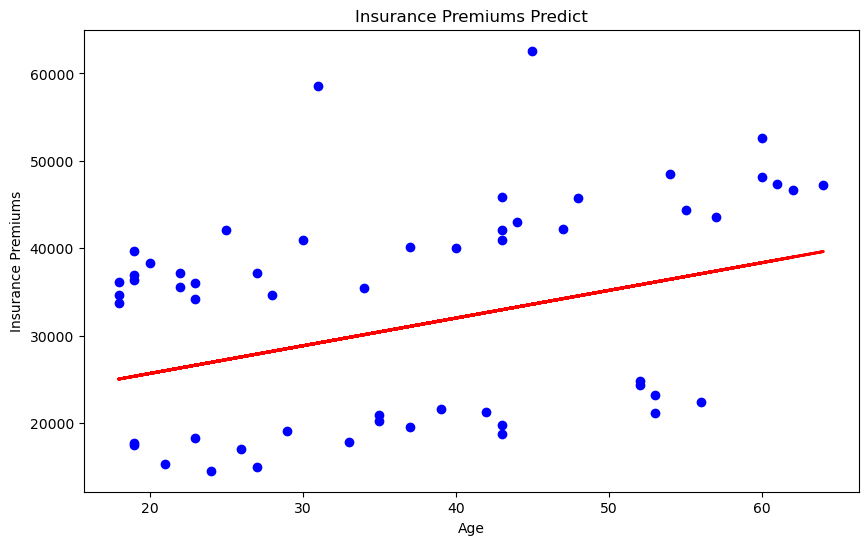

In [114]:
plt.figure(figsize=(10,6))
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,y_pred,color='red',linewidth=2)
plt.xlabel("Age")
plt.ylabel("Insurance Premiums")
plt.title("Insurance Premiums Predict")
plt.show()

In [147]:
#For smokers, age alone is insufficient to estimate the cost of insurance.

### Multivariate Regression Analysis

##### Let's create a model for non-smokers

In [115]:
X=non_smoker_df[['age','bmi']]
y=non_smoker_df.charges

In [117]:
print('Size of the x:',X.shape)
print('Size of the y:',y.shape)

Size of the x: (1064, 2)
Size of the y: (1064,)


In [118]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [119]:
print('Size of the X_train:',X_train.shape)
print('Size of the X_test:',X_test.shape)
print('Size of the y_train:',y_train.shape)
print('Size of the y_test:',y_test.shape)

Size of the X_train: (851, 2)
Size of the X_test: (213, 2)
Size of the y_train: (851,)
Size of the y_test: (213,)


In [120]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [121]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

In [122]:
print('MAE:',mae)
print('MSE:',mse)
print('RMSE:',rmse)
print('R2:',r2)

MAE: 2515.383373562121
MSE: 19707832.247387648
RMSE: 4439.350430793636
R2: 0.4386579932710998


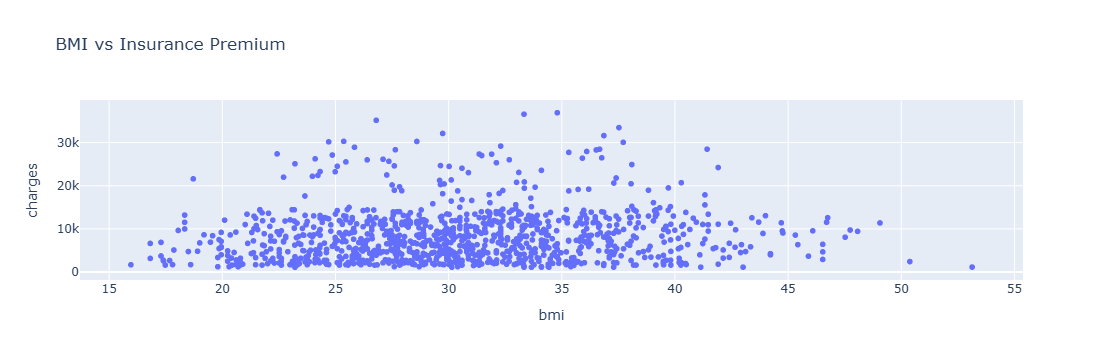

In [125]:
fig=px.scatter(non_smoker_df,x='bmi', y='charges', title='BMI vs Insurance Premium')
fig.show()

In [148]:
#This model has had some success in predicting insurance rates, but it is still not accurate enough. 
#The R² value is 44% and the model's errors average around $2,500.

In [149]:
fig=px.scatter_3d(non_smoker_df,x='age', y='bmi', z='charges', title='Age,BMI vs Insurance Premium')
fig.update_traces(marker_size=3,marker_opacity=0.5)
fig.show()

In [127]:
w1,w2=model.coef_
print('Coefficient(w):',w1,w2)
print('Constant(b):',model.intercept_)

Coefficient(w): 263.89103186520276 22.425857556288257
Constant(b): -2638.2326157753014


In [128]:
### let's add the number of children
X=non_smoker_df[['age','bmi','children']]
y=non_smoker_df.charges
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print('MAE:',mae)
print('MSE:',mse)
print('RMSE:',rmse)
print('R2:',r2)

MAE: 2456.4879836933274
MSE: 19258762.38494524
RMSE: 4388.480646527365
R2: 0.45144893722579615


In [150]:
#	The model explains about 45% of insurance fees, further improvements could be made.

##### Let's create a model for smokers

In [129]:
x = smoker_df[['age','bmi']]
y = smoker_df.charges

In [130]:
print('Size of the x:',x.shape)
print('Size of the y:',y.shape)

Size of the x: (274, 2)
Size of the y: (274,)


In [131]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.20, random_state = 42)

In [132]:
print('size of the x_train:', x_train.shape)
print('size of the x_test:', x_test.shape)
print('size of the y_train:', y_train.shape)
print('size of the y_test:', x_test.shape)

size of the x_train: (219, 2)
size of the x_test: (55, 2)
size of the y_train: (219,)
size of the y_test: (55, 2)


In [133]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [134]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

In [135]:
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2:",r2)

MAE: 4704.151857563897
MSE: 44737322.97027482
RMSE: 6688.596487326382
R2: 0.7018428611489815


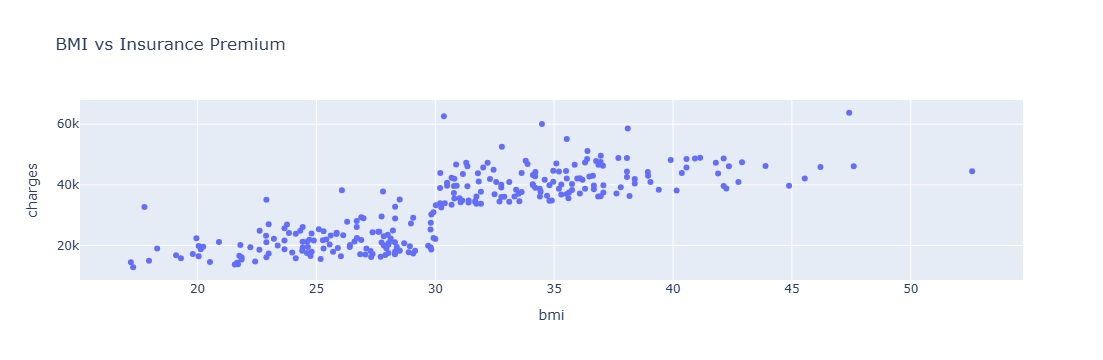

In [137]:
fig = px.scatter(smoker_df, x = 'bmi', y ='charges', title = 'BMI vs Insurance Premium')
fig.show()

In [152]:
#This model achieves high accuracy in predicting insurance fees for smokers (R² = 0.70), 
#but the mean error and large deviations (MAE = 4704 USD, RMSE = 6688 USD) suggest that there is still room for improvement.

In [153]:
fig = px.scatter_3d(smoker_df, x = 'age', y = 'bmi', z ='charges', title = 'Age, BMI vs Insurance Premium')
fig.update_traces(marker_size = 3, marker_opacity = 0.5)
fig.show()

In [140]:
w1,w2 = model.coef_
print('Coefficient(w):', w1,w2)
print('Constant(b):', model.intercept_)

Coefficient(w): 249.54232882995817 1449.010048758918
Constant(b): -22244.39941950072


In [141]:
### let's add the number of children
x = smoker_df[['age','bmi','children']]
y = smoker_df.charges
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.20, random_state = 42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

In [142]:
r2 = r2_score(y_test,y_pred)
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2:",r2)
MAE: 4715.2369411420

MAE: 4715.236941142054
MSE: 44740831.330543526
RMSE: 6688.85874649357
R2: 0.7018194792702654


In [155]:
#This model provides high accuracy for smokers (R² = 0.70) and factors such as age, BMI, number of children, etc. 
#help it to predict insurance fees well.However, the average error and large deviations (RMSE = 6688 USD) suggest that there is still room for improvement.